In [ ]:
from Trafic import *
import matplotlib.pyplot as plt

In [2]:
def indice_voiture(route, i):
    return np.where(route == i)[0]


def calculer_flux(route1, route2):
    taille = len(route1)
    nb_voitures = int(max(route1))
    deplacement = 0
    for i in range(1, nb_voitures+1):
        pos1 = indice_voiture(route1, i)
        pos2 = indice_voiture(route2, i)
        deplacement += (pos2-pos1)%taille
    return deplacement/nb_voitures


def flux_chaine(chaine):
    flux = []
    for r1, r2 in zip(chaine, chaine[1:]):
        flux.append(calculer_flux(r1, r2))
    return np.array(flux)

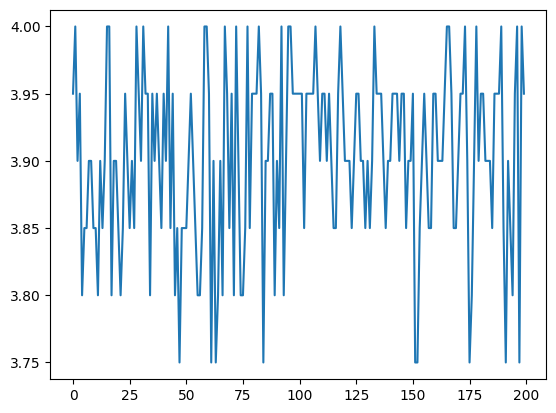

In [3]:
cm = CM_Route(route_unif(100, 20), 200, 10, 0.1)
plt.plot(flux_chaine(cm))
plt.show()